<a href="https://colab.research.google.com/github/sarangis/python_learning/blob/main/Additional_NB_02_TextVectorization_and_Embedding_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in Agentic and Generative AI
## A Programme by IISc and TalentSprint
### Additional Notebook: TextVectorization & Embedding Layers

## Learning Objectives

At the end of the experiment, you will be able to:

* understand the big picture of transformers
* understand and work with the TextVectorization layer
* understand and work with the Embedding layer
* learn word embeddings during model training
* perform visualization of word embeddings

### The Big Picture of Transformer

TextVectorization and Embedding Layers are used in Encoder-Decoder Transformer.

<br>

<center>
<img src= "https://cdn.iisc.talentsprint.com/AIandMLOps/Images/M5%20AST%205%20Big%20Picture.png" width=800px/>
</center>

Above is the entire architecture of transformer. A TextVectorization layer, Embedding layer, an Encoder and a Decoder.

Transformer architecture follows an encoder-decoder structure. The encoder, on the left-hand side, is tasked with mapping an input sequence to a sequence of continuous representations; the decoder, on the right-hand side, receives the output of the encoder together with the decoder output at the previous time step to generate an output sequence.

The Transformer architecture was originally designed for translation. In the encoder, the attention layers can use all the words in a sentence (since, as we just saw, the translation of a given word can be dependent on what is after as well as before it in the sentence). The decoder, however, works sequentially and can only pay attention to the words in the sentence that it has already translated (so, only the words before the word currently being generated). For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word.

To speed things up during training (when the model has access to target sentences), the decoder is fed the whole target, but it is not allowed to use future words (if it had access to the word at position 2 when trying to predict the word at position 2, the problem would not be very hard!). For instance, when trying to predict the fourth word, the attention layer will only have access to the words in positions 1 to 3.

TextVectorization and Embedding Layers are also required in Encoder-only Transformer.

<br>

<center>
<img src= "https://cdn.iisc.talentsprint.com/AIandMLOps/Images/M5_AST_05_Image1_Transformer.png" width=900px/>
</center>

In this notebook encoder & decoder will not form the topic of discussion, the main focus will be on the TextVectorization and Embedding Layers.
This has been discussed in detail in the later sections of this notebook.

## Dataset Description

The **IMDb Movie Reviews dataset** is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDb) labeled as *positive* or *negative*. The dataset contains an even number of positive and negative reviews.

This dataset is processed and used in the later sections of this notebook.

### Download the Dataset

In [ ]:
#@title Run this cell to Download the Dataset
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xvzf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

### Importing required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, pathlib, shutil, random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.utils import text_dataset_from_directory

from sklearn.decomposition import PCA

## TextVectorization

It invloves preparing the text data:
  * Text standardization
  * Text splitting into tokens
  * Vocabulary indexing
  


A flowchart depicting the procedure or sequence of steps followed in a TextVectorization layer.
* 'Standardization' is taking care of basic preprocessing of text data such as removing the punctuation and converting the text to lower case.
* 'Tokenization' is giving the list of words from the sentence.
* Later, these words are represented with indices and with the help of embedding to get the vector encoding of indices.

<center>
<img src= "https://cdn.iisc.talentsprint.com/AIandMLOps/Images/M5_AST_05_Transformer_Encoder_Text_data_prep.png" width=650px/>
</center>


All these steps are performed in a TextVectorization Layer.


*   Keras provides a TextVectorization layer which can be dropped directly into
      - a tf.data pipeline **or**
      - a Keras model

*  MOREOVER, TextVectorization also handles both approaches of representing groups of words:
      - Words as a set or Bag-of-words
      - Words as a sequence







### Define a dummy dataset and a test sentence


In [ ]:
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]

test_sentence = "I write, rewrite, and still rewrite again"
# dataset_t = ["I write, rewrite, and still rewrite again"]

#Q: Is the word 'still' in the dataset (vocabulary)? Is it there in the test_sentence?
#Ans: No, the word 'still' is not in the dataset, but it is present in the test_sentence.

#Q: How many words in test_sentence?
#Ans: There are 7 words in the test_sentence, if we check the unique words then the count is 6.

### Create a TextVectorization layer and adapt to dummy dataset

Create and demonstrate the working of a TextVectorization layer.

In [ ]:
#Q: What 3 things does a TextVec layer do?
#Ans:
#1. 'Standardization' is taking care of basic preprocessing of text data such as removing the punctuation and converting the text to lower case.
#2. 'Tokenization' is giving the list of words from the sentence.
#3. Later, these words are represented with indices and with the help of embedding to get the vector encoding of indices.

# Instantiating a TextVectorization layer/object with output mode as integer
text_vectorization = TextVectorization(
    output_mode="int",              # Optional specification for the output of the layer. Values can be "int", "multi_hot", "count" or "tf_idf"
    max_tokens=15,                  # Vocabulary size
    output_sequence_length=10,      # Maximum length of output sequence
    # We can use custom functions also for standardizing and splitting the text - see the Book by Chollet
    # standardize=custom_standardization_fn,
    # split=custom_split_fn,
)

# Adapt to data
text_vectorization.adapt(dataset)      # Computes a vocabulary of string terms from tokens in a dataset


In [ ]:
# To see the working of TextVectorization
vocabulary = text_vectorization.get_vocabulary()
print(f"vocabulary = {vocabulary}")
print(f"len(vocabulary) = {len(vocabulary)}")

vocabulary = ['', '[UNK]', np.str_('erase'), np.str_('write'), np.str_('then'), np.str_('rewrite'), np.str_('poppy'), np.str_('i'), np.str_('blooms'), np.str_('and'), np.str_('again'), np.str_('a')]
len(vocabulary) = 12


In [ ]:
# To see how the the text_vec layer transforms/vectorizes the raw text
encoded_sentence = text_vectorization(test_sentence)
print(f'Test sentence = {test_sentence}')
print(f"encoded sentence = {encoded_sentence}")
print(f"len(encoded sentence) = {len(encoded_sentence)}")
# print(f"encoded dataset_t = {text_vectorization(dataset_t)}")

Test sentence = I write, rewrite, and still rewrite again
encoded sentence = [ 7  3  5  9  1  5 10  0  0  0]
len(encoded sentence) = 10


In [ ]:
# decode back for comparison with test_sentence
inverse_vocab = dict(enumerate(vocabulary)) # making a dictionary to decode embeddings
print(f"inverse_vocab = {inverse_vocab}")
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
print(f"decoded sentence = {decoded_sentence}")

inverse_vocab = {0: '', 1: '[UNK]', 2: np.str_('erase'), 3: np.str_('write'), 4: np.str_('then'), 5: np.str_('rewrite'), 6: np.str_('poppy'), 7: np.str_('i'), 8: np.str_('blooms'), 9: np.str_('and'), 10: np.str_('again'), 11: np.str_('a')}
decoded sentence = i write rewrite and [UNK] rewrite again   


In [ ]:
print(f"test_sentence = {test_sentence}")

test_sentence = I write, rewrite, and still rewrite again


In [ ]:
# Q: What is a vocabulary?
# Ans: A vocabulary is the set of all unique tokens (words, characters, or subwords) extracted from a given dataset or corpus

# Q: No. of tokens in vocabulary?
# Ans: No. of tokens in vocabulary is known as the Vocabulary Size.

# Q: Length of encoded_sentence (output of TextVec layer)?
# Ans: The maximum length of the TextVec layer is controlled by the `output_sequence_length` parameter.

# Q: Type of elements in encoded_sentence (embedding)?
# Ans: The type of elements in encoded_sentence is controlled by the `output_mode` parameter.
#      Values can be "int", "multi_hot", "count" or "tf_idf". For more details, refer here (https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization).

# Q: Is decoded sentence the same as the test_sentence? Why?
# test_sentence = "I write, rewrite, and still rewrite again"
# decoded_sentence = "i write rewrite and [UNK] rewrite again"
# Ans: The test sentence and decoded sentence are not same besause the word 'still' is not there in the vocabulary and is being represented as [UNK] i.e. Unkown token.


## Processing the dataset using TextVectorization layer of keras

### Data Preparation

Originally IMDB dataset contains the *train* and the *test* folders.
Here, the original dataset will be used and pre-processing related to it will be explored.

In [ ]:
# List subdirectories
!cd aclImdb && ls -d */

test/  train/


In [ ]:
# Remove unnecessary folder
!rm -r aclImdb/train/unsup

In [ ]:
# Visualise a sample
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

### Create a validation directory and move 20% of the train data to it

In [ ]:
# move 20% of the training data to the validation folder
base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"

for category in ("neg", "pos"):
    os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    # random.Random(1337).shuffle(files) # We should shuffle. Only commenting for demonstration
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname,
                    val_dir / category / fname)

### Create batches of data using `text_dataset_from_directory`

In [ ]:
# Create dataset using utility
batch_size = 32

train_ds = text_dataset_from_directory("aclImdb/train", batch_size=batch_size)

val_ds = text_dataset_from_directory("aclImdb/val", batch_size=batch_size)

test_ds = text_dataset_from_directory("aclImdb/test", batch_size=batch_size)

# Extracting only the review text(not labels); to be used later to adapt the TextVec layer
text_only_train_ds = train_ds.map(lambda x, y: x)             # lambda x, y: x  --> replace x,y with x. That is remove labels, just keep text data.


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


There are 20000, 5000, and 25000 records in train, validation, and test directories with two class as positive and negative.

In [ ]:
# Check shapes

for inputs, targets in train_ds:

    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)

    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)

    print("inputs[2]:", inputs[2])
    print("targets[2]:", targets[2])

    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[2]: tf.Tensor(b"Its plain to see why the makers of Scary Movie found it so easy to spoof these 'teen slasher' movies. They are so unbelievably formulaic. And if Valentine had been released a year or so earlier, I'm sure they would have been spoofing this film too - that's if they found any actual original material to distinguish it from the Screams, I know what you did last summers, and Urban Legends.<br /><br />Valentine offers nothing new to this genre, except a better than usual ending which, of course, leaves lots of room for the inevitable sequel. As always, a masked psychotic killer stalks a bunch of beautiful young women, killing the main character's friends, one by one, in typically over the top style. Lots of T&A on display, no character development, bad acting, and overly elaborate bloodshed.<br /><br />The thing I can't stand about these kind of movies is that they

### Create TextVectorization layer and adapt to dataset

In [ ]:
[0,1,0,1,0,0]

[0, 1, 0, 1, 0, 0]

In [ ]:
tf.reshape([0,1,0,1,0,0], (-1,1))

<tf.Tensor: shape=(6, 1), dtype=int32, numpy=
array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]], dtype=int32)>

In [ ]:
# Vectorizing the data
max_length = 600
max_tokens = 20000
text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,    # Q: What is the vocabular size?  # Ans: 20000
    output_mode="int",        # Q: What will be the type of output for a token (say), 'amazing' ?  # Ans: The type will be 'int'
    output_sequence_length=max_length,      # Q: What is the maximum length of review? Is it a fair assumption?  # Ans: Max length is kept as 600
    )

# Adapt to dataset
text_vectorization.adapt(text_only_train_ds)


# Apply TextVec to train, val, test set

int_train_ds = train_ds.map(lambda x, y: (text_vectorization(x), tf.reshape(y, (-1,1))),
                            num_parallel_calls=4)

int_val_ds = val_ds.map(lambda x, y: (text_vectorization(x), tf.reshape(y, (-1,1))),
                        num_parallel_calls=4)

int_test_ds = test_ds.map(lambda x, y: (text_vectorization(x), tf.reshape(y, (-1,1))),
                          num_parallel_calls=4)


### Visualize and compare the raw and processed data

In [ ]:
# Let's visualize the raw text and the vectorized (to int) text
for text, label in train_ds:
  print(text[0])
  print(label[0])
  break

for int_of_text, label in int_train_ds:
  print(int_of_text[0])
  print(label[0])
  break

# Q: How can you verify whether the index of movie is 18?


tf.Tensor(b'With all thats going on in the world sometimes we need an escape. Curly Sue is just that. Not a complicated plot or deep meaning; however it is not devoid of substance. There is more than furious action or heart pounding dramas. There are the charming little shows you can watch with your kids and have enough substance to enjoy with your date. Try it you may like it more than you think. The little girl is really smart and cute. The "Dad" and the girl go thru some slapstick routines. When a jealous boyfriend steps in, trouble brews for Curly and the life shes known may be torn asunder. Fred Thompson and Kelly Lynch play good roles as the upper crust and Alison Porter and James Belushi are a interesting fable like duo portraying street wise homeless drifters. Their worlds collide and comedy ensues.', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[   11    20  1247     2    29 11242    12    32  1081    93   139    26
     4    12     7   284  1435  849

Vector representation of the word 'movie'

In [ ]:
text_vectorization("movie")

# Q: What is the shape of the TextVec output?
# Ans: Shape is (1,600) OR (600,)

# Q: Why so many 0s?
# Ans: Becasue the output sequence length is already specified as 600 while initializing the TextVec layer.


<tf.Tensor: shape=(600,), dtype=int64, numpy=
array([19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

Vector representation of "great movie" and "a fine story"

In [ ]:
text_vectorization(["great movie", "a fine story"])

# Q: shape?
# Ans: Output shape is (2,600). The 2 denotes the number of samples, and 600 is the vector output length from the TextVec layer.


<tf.Tensor: shape=(2, 600), dtype=int64, numpy=
array([[ 84,  19,   0, ...,   0,   0,   0],
       [  3, 464,  64, ...,   0,   0,   0]])>

## Word Embeddings

**Why do we need Word Embeddings?**

To deal with textual data, we need to convert it into numbers before feeding it into any machine learning model. For simplicity, words can be compared to categorical variables. We use one-hot encoding to convert categorical features into numbers. To do so, we create dummy features for each of the category and populate them with 0's and 1's.

Similarly, if we use one-hot encoding on words in textual data, we will have a dummy feature for each word, which means 10,000 features for a vocabulary of 10,000 words. This is not a feasible embedding approach as it demands large storage space for the word vectors and reduces model efficiency and no relation is captured between words.

**Word embeddings** are vector representations of words that achieve exactly this: they map human language into a structured geometric space.

* dense (floats)
* low-dimensional (1024 dims for large vocabs)

There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (such as document classification or sentiment prediction). In this setup, you start with random word vectors and then learn word vectors, in the same way you learn the weights of a neural network. **Move away from manual feature engineering.**
* Load into your model word embeddings that were precomputed using a different machine learning task than the one you’re trying to solve. These are called pretrained word embeddings.

In this notebook the main agenda is to explore the Learning of word embeddings.




### Embedding Layer


The procedure if as follows:

*   Like a dictionary that **maps integer indices** (which stand for specific words) **to dense vectors**

*   Input: a rank-2 tensor of integers, of shape (batch_size, sequence_length)
*   Output: 3D floating-point tensor of shape (batch_size, sequence_length, embedding_dimensionality)
*   WORD INDEX ⭢ EMBEDDING LAYER ⭢ CORRESPONDING WORD VEC

*   Initial weights are random
*   Learns specialized structure upon training



### Visualization of Word Embeddings

Apply dimensionality reduction to the word embeddings to convert it into 2D. Later, plot this 2D vector.

<br><br>
<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Word_Embedding.png" width="650" height="450">
</center>

Visualization in 3D:

<center>
<img src= "https://cdn.iisc.talentsprint.com/AIandMLOps/Images/M5%20AST5%20Embedding%20Layer.png" width=750px/>
</center>


### Define a NN architecture with a TextVectorization layer, an Embedding layer, and Dense layers

In [ ]:
max_tokens = 20000
inputs = keras.Input(shape=(1,), dtype=tf.string)

# The Text Vectoritation layer
txt_vec_out = text_vectorization(inputs)             # Note that this TextVec layer is already apadted on the train dataset

# The Embedding layer
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256, name='embedding')(txt_vec_out)    # the largest integer (i.e. word index) in the input
                                                                                                    # should be no larger than 19999 (vocabulary size).
# Q: What is the input to the Embedding layer?
# Ans: The output of TextVec layer will be the input to the Embedding layer.

# Q: What is the dimension of the output embeddings?
# Ans: Embedding dimension = 256

x = layers.Dense(64, activation="relu")(embedded)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 600)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 600, 256)       │     5,120,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 600, 64)        │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 600, 32)        │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 600, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 600, 16)        │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 600, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,139,073 (19.60 MB)

 Trainable params: 5,139,073 (19.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Q: In embedding layer shape as shown in the model summary above, what is None?
# Ans: It denotes the batch size

# Q: Calculate the number of Weights in the embedding layer?
# Ans: Consider a dictionary mapping, or a lookup table where 1 input word is represented as an embedding of size 256.
#      Similary, if the vocabulary size is 20,000 then the num of weights will be 20,000 x 256 = 5,120,000

# Q: Calculate the number of parameters in the first Dense layer having 64 neurons?
# Ans: The formula to calculate the number of parameters in a hidden (Dense/Fully Connected) layer is:
#      Number of parameters = (𝑁_𝑖𝑛 × 𝑁_𝑜𝑢𝑡) + 𝑁_𝑜𝑢𝑡
#      where 𝑁_𝑖𝑛 = Number of input neurons
#            𝑁_𝑜𝑢𝑡 = Nout = Number of neurons in the hidden layer
#            𝑁_𝑖𝑛 × 𝑁_𝑜𝑢𝑡 = Weights
#            𝑁_𝑜𝑢𝑡 = Bias terms (one bias per neuron)
#      So, for the first dense layer, num of parameters = (256 x 64) + 64 = 16,448


### Visualize the words in 2D-plane by reducing the dimensions using PCA

Use the word embeddings from before and after model training

In [ ]:
# Get the embedding layer
embedding_layer = model.get_layer('embedding')

# Get the embeddings
embeddings = embedding_layer.get_weights()[0]
embeddings.shape

(20000, 256)

In [ ]:
# Get the vocabulary from the TextVectorization layer
vocab = text_vectorization.get_vocabulary()
len(vocab)

20000

In [ ]:
# Sample words to visualize word embeddings for
test_words = ['good', 'bad', 'nice', 'poor', 'terrible', 'terrific', 'awesome', 'awful', 'best', 'worst']

print(f"{'Word':<15} {'Index'}")
print("="*30)
for word in test_words:
    print(f"{word:<15} {vocab.index(word)}")

Word            Index
good            50
bad             86
nice            318
poor            327
terrible        380
terrific        1256
awesome         1163
awful           373
best            115
worst           243


In [ ]:
# Embedding dimension
embeddings[vocab.index('good')].shape

(256,)

In [ ]:
# Create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class
# n_components in PCA specifies the no. of dimensions
pca = PCA(n_components=2, random_state=42)

# Fit and transform the vectors using PCA model
reduced_untrained_emb = pca.fit_transform(embeddings)
reduced_untrained_emb.shape

(20000, 2)

In [ ]:
# Reduced embedding for word 'good'
reduced_untrained_emb[vocab.index('good')]

array([ 0.03835404, -0.0159983 ], dtype=float32)

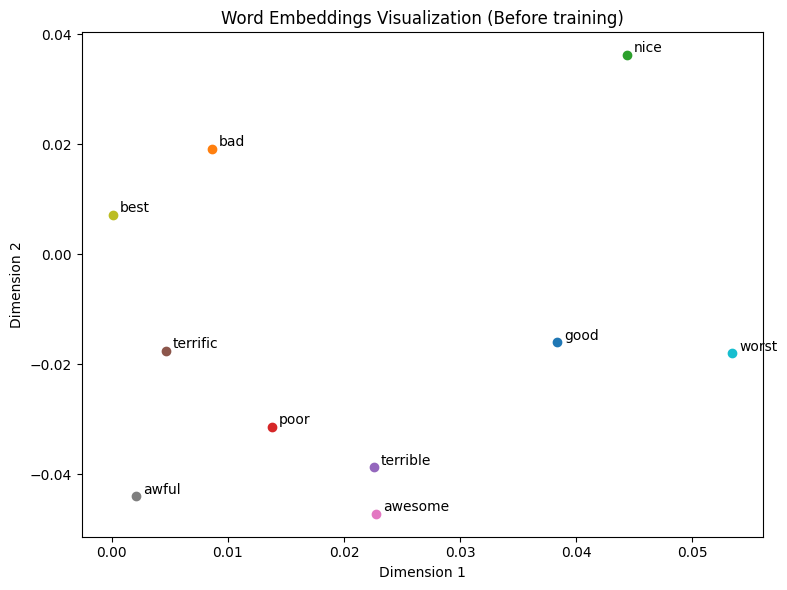

In [ ]:
# Visualize the embeddings
plt.figure(figsize=(8, 6))
for word in test_words:
    if word != '':  # Skip the empty string token
        x, y = reduced_untrained_emb[vocab.index(word)]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points')

plt.title("Word Embeddings Visualization (Before training)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()

### Train the model *(Switch to GPU runtime if needed)*

In [ ]:
# Fit the model on train set
callbacks = [keras.callbacks.ModelCheckpoint("one_hot_dense.keras", save_best_only=True)]

# Change target shape from (None,) to (None, 1)
train_dataset = train_ds.map(lambda x, y: (x, tf.reshape(y, (-1,1))))                # Note that we are using 'train_ds' and not 'int_train_ds'
val_dataset = val_ds.map(lambda x, y: (x, tf.reshape(y, (-1,1))))

model.fit(train_dataset,
          validation_data = val_dataset,
          epochs = 20,
          callbacks = callbacks)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5038 - loss: 0.6931 - val_accuracy: 0.5588 - val_loss: 0.6898
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5825 - loss: 0.6765 - val_accuracy: 0.7768 - val_loss: 0.5245
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7889 - loss: 0.4826 - val_accuracy: 0.8604 - val_loss: 0.3506
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8641 - loss: 0.3348 - val_accuracy: 0.8800 - val_loss: 0.3086
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8929 - loss: 0.2606 - val_accuracy: 0.8888 - val_loss: 0.2803
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9158 - loss: 0.2216 - val_accuracy: 0.8918 - val_loss: 0.2809
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9274 - loss: 0.1871 - val_accuracy: 0.8904 - val_loss: 0.2968
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9385 - loss: 0.1611 - val_acc

In [ ]:
## Load saved model
# model = keras.models.load_model("one_hot_dense.keras")

# Check model performance
test_dataset = test_ds.map(lambda x, y: (x, tf.reshape(y, (-1,1))))
print(f"Test acc: {model.evaluate(test_dataset)[1]:.3f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8580 - loss: 0.6486
Test acc: 0.858


From the above test accuracy, it can be seen that the model perfomance is not that well. It is expected as we are using only Dense layers.

Let's see if the embeddings learned during training were able to capture the semantic relationships between words.

In [ ]:
# Get the embedding layer
trained_embedding_layer = model.get_layer('embedding')

# Get the embeddings
trained_embeddings = trained_embedding_layer.get_weights()[0]
trained_embeddings.shape

(20000, 256)

In [ ]:
# Create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class
# n_components in PCA specifies the no.of dimensions
pca = PCA(n_components=2, random_state=42)

# Fit and transform the vectors using PCA model
reduced_trained_emb = pca.fit_transform(trained_embeddings)
reduced_trained_emb.shape

(20000, 2)

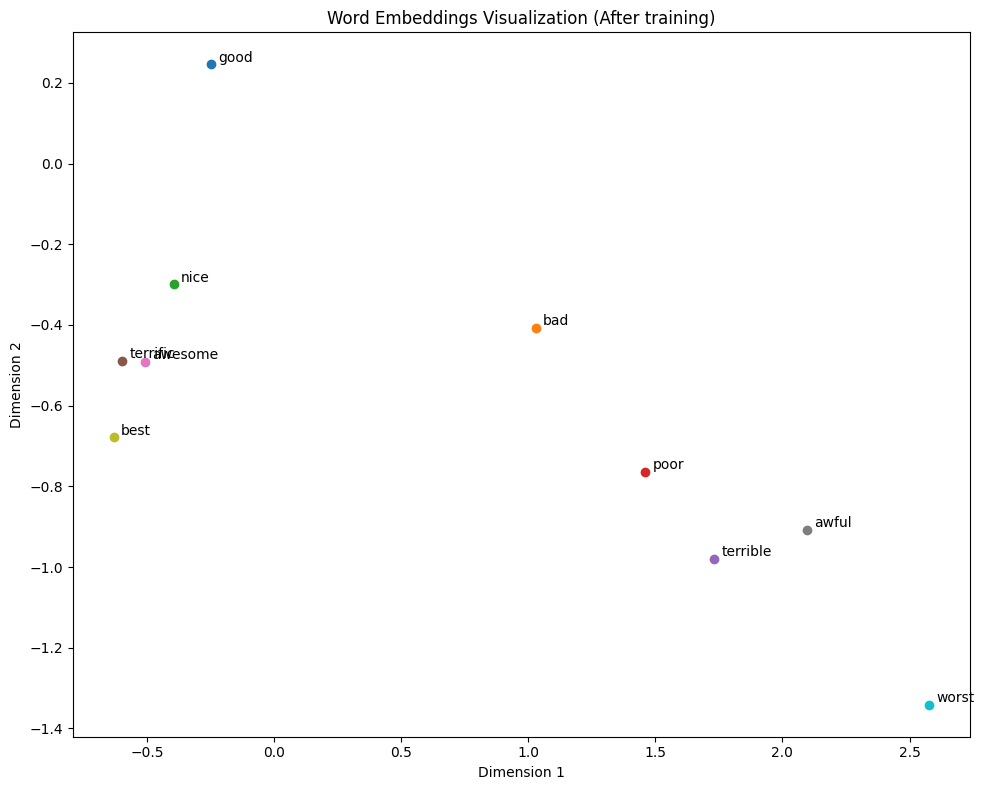

In [ ]:
# Visualize the embeddings
plt.figure(figsize=(10, 8))
for word in test_words:
    if word != '':  # Skip the empty string token
        x, y = reduced_trained_emb[vocab.index(word)]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points')

plt.title("Word Embeddings Visualization (After training)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()

From the above plot, it can be seen that good nice are more related, bad poor are more related, and so on.

---

<center>
$END$
</center>

---